In [3]:
#loading python packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
#importing MLP classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import accuracy_score
import os

In [4]:
#reading dataset and then extracting and training and testing features from dataset
le = LabelEncoder()
dataset = pd.read_csv('data.csv',nrows=1000)
print(dataset.head())
dataset = pd.read_csv('data.csv',usecols=['artists','name','year','popularity'],nrows=1000)
temp = pd.read_csv('data.csv',usecols=['artists','name','year','popularity'],nrows=1000)
dataset['artists'] = pd.Series(le.fit_transform(dataset['artists'].astype(str)))
dataset['name'] = pd.Series(le.fit_transform(dataset['name'].astype(str)))
Y = dataset['popularity']
Y = np.asarray(Y)
dataset.drop(['popularity'], axis = 1,inplace=True)
dataset = dataset.values
X = dataset[:,0:dataset.shape[1]]
#normalizing dataset
X = normalize(X)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

   acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.

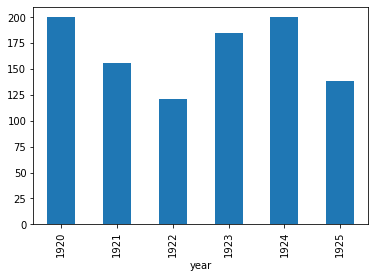

In [6]:
import matplotlib.pyplot as plt
label = temp.groupby('year').size()
label.plot(kind="bar")
plt.show()

In [7]:
#splitting dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
if os.path.exists('model/mlp.txt'): #loading mlp object
    with open('model/mlp.txt', 'rb') as file:
        mlp = pickle.load(file)
    file.close()
else:
    mlp = MLPClassifier(hidden_layer_sizes=500,max_iter=600)#creating MLP object 
    mlp.fit(X, Y) #training mlp
    with open('model/1mlp.txt', 'wb') as file:
        pickle.dump(mlp, file)
    file.close()
predict = mlp.predict(X_test) #predicting on test data
acc = accuracy_score(y_test,predict)*100 #calculating MLP accuracy
print("MLP Accuracy on test data : "+str(acc))

MLP Accuracy on test data : 98.0


In [8]:
#Recommending songs by giving input test data
test = pd.read_csv('testData.csv',encoding='iso-8859-1',usecols=['artists','name','year'])
print("Input Test Data to get Recommendation List\n")
print(test.head())
print("\n")
print("Output Recommendation List\n")
test['artists'] = pd.Series(le.fit_transform(test['artists'].astype(str)))
test['name'] = pd.Series(le.fit_transform(test['name'].astype(str)))
test = test.values
X = test[:,0:test.shape[1]]
X = normalize(X)
predict = mlp.predict(X) #predicting recommendation from input test data
data = temp.values
dups = []
for i in range(len(predict)):
    for j in range(len(data)):
        if data[j,2] == predict[i]:
            artist = data[j,0]
            name = data[j,1]
            year = data[j,3]
            if artist+name not in dups:
                dups.append(artist+name)
                print("Artist = "+artist)
                print("Name = "+name)
                print("Year = "+str(year)+"\n")

Input Test Data to get Recommendation List

                         artists                       name  year
0                     ['Jodoli']  Taro Yard Slaughter House  1920
1  ['Athanasía Alexandropoúlou']         I photoúla, beráti  1920
2                ['Dick Haymes']      Serenade of the Bells  1920
3                         ['ST']           Comme à l'époque  1920
4        ['Manolis Karapiperis']                   Aidiniko  1920


Output Recommendation List

Artist = ['Mixe']
Name = Xuniverxe
Year = 1920

Artist = ['696']
Name = After Life
Year = 1920

Artist = ['696']
Name = Curved Fist
Year = 1920

Artist = ['Sergei Rachmaninoff']
Name = Morceaux de fantaisie, Op. 3: No. 2, Prélude in C-Sharp Minor. Lento
Year = 1921

Artist = ['KHP Kridhamardawa Karaton Ngayogyakarta Hadiningrat']
Name = Prabu Mataram
Year = 1921

Artist = ['Sergei Rachmaninoff', 'Emanuel Ax', 'Yefim Bronfman']
Name = Suite No. 1, Op. 5 "Fantaisie-tableaux": II. La nuit? L'amour
Year = 1921

Artist = ['Paul W

In [10]:
#Collaborative Recommendation
#reading features from dataset
from scipy.sparse import csr_matrix

le = LabelEncoder()
dataset = pd.read_csv('SpotifyFeatures.csv',usecols=['genre','artist_name','track_id','popularity'],nrows=1000)
Y = dataset['popularity']
Y = np.asarray(Y)
#pivoting dataset to build collaborative filter table
dataset = dataset.reset_index().pivot(index = 'track_id', columns = 'artist_name', values = 'popularity').fillna(0)
columns = list(dataset.columns)
#create matrix array from filter table
dataset = csr_matrix(dataset.values)
#convert matrix into array and saved in dataset
dataset = dataset.toarray()
print(dataset)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
#splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(dataset, Y, test_size=0.2, random_state=0)
if os.path.exists('model/collaborative_mlp.txt'):
    with open('model/collaborative_mlp.txt', 'rb') as file:
        mlp = pickle.load(file)
    file.close()
else: #creating MLP object
    mlp = MLPClassifier(hidden_layer_sizes=2000,max_iter=2000,activation='logistic',solver='lbfgs',random_state=42)
    #training MLP with train data
    mlp.fit(X_train, y_train)
    with open('model/collaborative_mlp.txt', 'wb') as file:
        pickle.dump(mlp, file)
    file.close()
#predicting on test data using MLP classifier    
predict = mlp.predict(X_test)
#calculting accuracy of MLP
acc = accuracy_score(y_test,predict)*100
print("MLP Accuracy on test data : "+str(acc))

MLP Accuracy on test data : 59.5


In [15]:
#Performing new recommendation on user query for given artist
details = pd.read_csv('SpotifyFeatures.csv',usecols=['genre','artist_name','track_name','popularity'],nrows=1000)
details = details.values
query = ['The Judds','George Jones','Tracy Lawrence','The Avett Brothers']#user artist query
dups = []
print("\nCollaborative Filtering Recommendation using MLP\n")
for j in range(len(query)):
    test = []
    for i in range(len(columns)):
        if columns[i] == query[j]:
            test.append(1)
        else:
            test.append(0)
    temp = []
    temp.append(test)
    temp = np.asarray(temp)
    predict = mlp.predict(temp)
    for m in range(len(predict)):
        for n in range(len(details)):
            if details[n,3] == predict[m]:
                artist = details[n,1]
                track = details[n,2]
                if artist+track not in dups:
                    dups.append(artist+track)
                    print("Artist Name = "+artist)
                    print("Track Name = "+track+"\n")
                    
    


Collaborative Filtering Recommendation using MLP

Artist Name = Henri Salvador
Track Name = C'est beau de faire un Show

Artist Name = Henri Salvador
Track Name = Dis-moi Monsieur Gordon Cooper

Artist Name = Henri Salvador
Track Name = Le petit souper aux chandelles

Artist Name = Chorus
Track Name = Helka

Artist Name = Leopold Stokowski
Track Name = Symphony No.4 In E Minor Op.98 : IV. Allegro Energico E Passionato

Artist Name = Richard M. Sherman
Track Name = Keys of Love

Artist Name = Michel Roux
Track Name = Les aventures d'Arsène Lupin: 813 - Partie 6

Artist Name = Jean Claude Corbel
Track Name = Diane

Artist Name = Jean Claude Corbel
Track Name = Pourquoi aller plus loin ?

Artist Name = Jean Piat
Track Name = Comme minuit sonnait

Artist Name = Henri Salvador
Track Name = Le Fêtard

Artist Name = Lucie Dolene
Track Name = Le mariage des poupées

Artist Name = Chorus
Track Name = Mangani – Do Banjare / Amba Heth

Artist Name = Chorus
Track Name = A ty się śmiejesz ze mnie
